### Zadania
1. Napisać własną implementację interpolacji wielomianowej stosując wprost wzór na wielomian interpolacyjny  Lagrange'a .  Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji. <b>(1 pkt)</b>

1. Zrobic to samo dla metody  Newtona (metoda ilorazów róznicowych).Narysować wykres wielomianu interpolacyjnego otrzymanego metodą Newtona dla tych samych danych, co w poprzednim punkcie. Zadbać o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji, według schematu z pakietu Interpolations http://juliamath.github.io/Interpolations.jl/stable/interpolations/ : 
   1. napisać funkcję `NewtonInterpolation`, która wylicza ilorazy różnicowe i zwraca "obiekt interpolacyjny" `newt`
   1. napisać funkcję która wylicza wartość wielomianu dla obiektu `newt` w punkcie x za pomocą  <b>schematu Hornera dla postaci Newtona </b> <b>(2 pkt)</b>

1. Zastosować interpolację wielomianową z pakietu Polynomials do tych samych danych, co w poprzednich punktach. Porównać wszystkie 3 wyniki interpolacji wielomianowej na jednym wykresie. Co zauważamy? Dlaczego? <b>(1 pkt)</b>

1. Porównać metody poprzez pomiar czasu wykonania dla zmiennej ilości węzłow interpolacji. Uwaga: dodatkowo, dla metody Newtona i pakietu Polynomials należy osobno zmierzyć czas wyliczania wielomianu i osobno czas wyliczania wartości w punkcie. Dokonać pomiaru 10 razy i policzyć wartość średnią oraz oszacować błąd pomiaru za pomocą odchylenia standardowego; wyniki przedstawić na wykresach. <b>(2 pkt)</b>

1. Zaimplementować algorytm Neville’a i sprawdzić (dla kilku wybranych punktów), czy daje te same wartości wielomianu co wybrana interpolacja wielomianowa.<b>(1 pkt)</b>

1. Poeksperymentować z  interpolacją funkcjami sklejanymi (minimum dwie różne funkcje sklejane),  narysować wykresy i porównać z wykresami interpolacji wielomianowej. <b>Zademonstrować  efekt Rungego</b> <b>(1 pkt)</b>. 

### Zadanie 1
Napisać własną implementację interpolacji wielomianowej stosując wprost wzór na wielomian interpolacyjny  Lagrange'a .  Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji. <b>(1 pkt)</b>

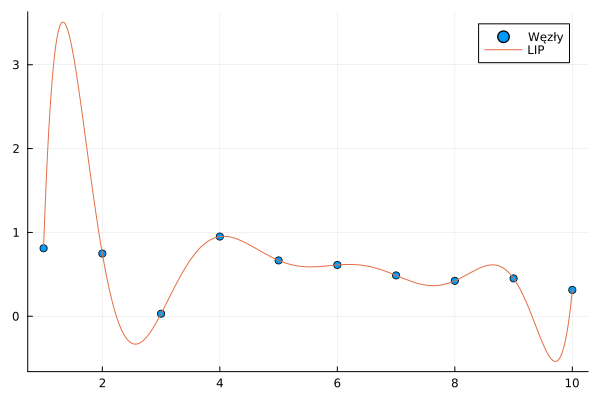

In [ ]:
using Plots

# Baza Lagrange’a
function L(k, X, xs)
    product = 1
    for (i, x) in enumerate(xs)
        if (i == k)
            continue
        end
        product *= (X - x) / (xs[k] - x)
    end
    return product
end

# Wielomian Interpolacyjny Lagrange’a
function LIP(xs, ys)
    return function(x::Number)
        sum = 0
        for (i, y) in enumerate(ys)
            sum += y * L(i, x, xs)
        end
        return sum
    end
end

xs =  1:1:10
ys = [rand() for x in xs]

scatter(xs, ys, label="Węzły")

f = LIP(xs, ys)
plot!(f,  extrema(xs)..., label="LIP")

### Zadanie 2
Zrobic to samo dla metody  Newtona (metoda ilorazów róznicowych).Narysować wykres wielomianu interpolacyjnego otrzymanego metodą Newtona dla tych samych danych, co w poprzednim punkcie. Zadbać o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji, według schematu z pakietu Interpolations http://juliamath.github.io/Interpolations.jl/stable/interpolations/ : 
   1. napisać funkcję `NewtonInterpolation`, która wylicza ilorazy różnicowe i zwraca "obiekt interpolacyjny" `newt`
   1. napisać funkcję która wylicza wartość wielomianu dla obiektu `newt` w punkcie x za pomocą  <b>schematu Hornera dla postaci Newtona </b> <b>(2 pkt)</b>

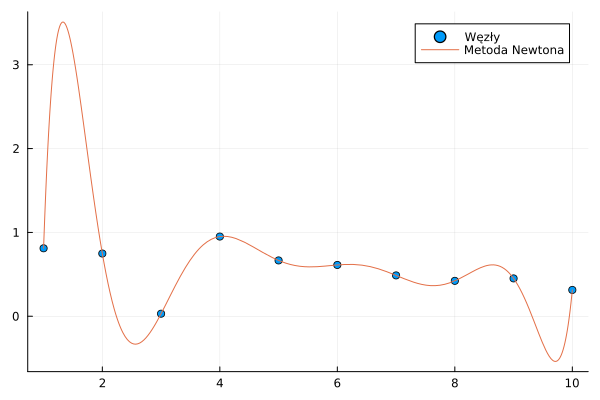

In [ ]:
function NewtonInterpolation(xs, ys)
    n = length(xs)
    dq = zeros(n, n) # macierz ilorazów różnicowych

    for i in 1:n
        dq[i,1] = ys[i]
    end

    for i in 2:n
        for j in 2:i
            dq[i,j] = (dq[i,j-1] - dq[i-1,j-1]) / (xs[i] - xs[i-j+1])
        end
    end

    return (dq, xs) # zwracamy obiekt interpolacyjny newt, tj. krotkę 2. obiektów: macierz ilorazów różnicowych oraz tablicę węzłów interpolacji
end

function computePolynomialValue(newt, x)
    dq = newt[1]
    xs = newt[2]
    n = size(dq, 1)

    value = dq[n,n]

    # stosujemy schemat Hornera
    for k in n-1:-1:1
        value = dq[k,k] + (x-xs[k]) * value
    end

    return value
end

newt = NewtonInterpolation(xs, ys)
newton(x) = computePolynomialValue(newt, x)

scatter(xs, ys, label="Węzły")
plot!(newton,  extrema(xs)..., label="Metoda Newtona")

### Zadanie 3
Zastosować interpolację wielomianową z pakietu Polynomials do tych samych danych, co w poprzednich punktach. Porównać wszystkie 3 wyniki interpolacji wielomianowej na jednym wykresie. Co zauważamy? Dlaczego? <b>(1 pkt)</b>

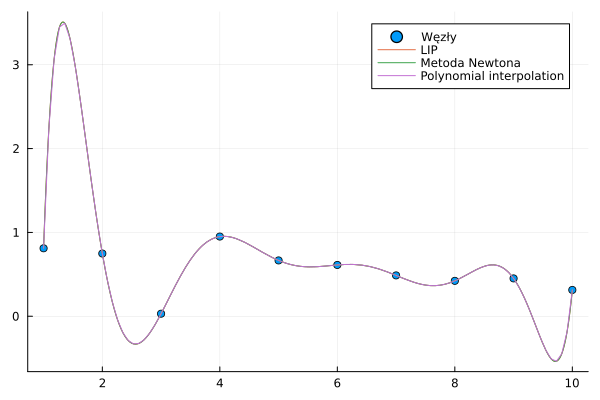

In [ ]:
using Polynomials

scatter(xs, ys, label="Węzły")
poly = fit(xs, ys)
plot!(f,  extrema(xs)..., label="LIP")
plot!(newton,  extrema(xs)..., label="Metoda Newtona")
plot!(poly,  extrema(xs)..., label="Polynomial interpolation")

Można zauważyć, że wszystkie 3 funkcje się pokrywają, tj. wyszedł nam taki sam wielomian dla każdej z trzech metod interpolacji.
Jedyną zauważalną różnicą są szpice ekstremów lokalnych wielomianów. Widzimy, że dla interpolacji z pakietu Polynomial wierzchołki ekstremów lokalnych są nieco ścięte. Może to wynikać z rzadkiego rozstawienia punktów xs przy rysowaniu wykresów funkcji interpolujacych. 

### Zadanie 4
Porównać metody poprzez pomiar czasu wykonania dla zmiennej ilości węzłow interpolacji. Uwaga: dodatkowo, dla metody Newtona i pakietu Polynomials należy osobno zmierzyć czas wyliczania wielomianu i osobno czas wyliczania wartości w punkcie. Dokonać pomiaru 10 razy i policzyć wartość średnią oraz oszacować błąd pomiaru za pomocą odchylenia standardowego; wyniki przedstawić na wykresach. <b>(2 pkt)</b>

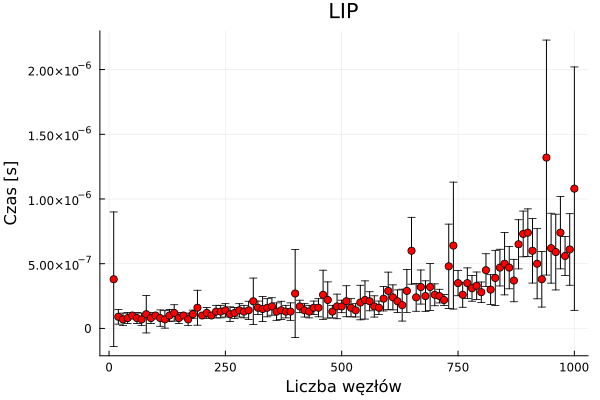

In [ ]:
using DataFrames
using Statistics
using Plots
using Polynomials

# Tablica zawierająca wszystkie ilości węzłów interpolacji
no_nodes = range(10, stop=1000, step=10)

# Liczba pomiarów
num_measurements = 10

# Struktura DataFrame, w którym będziemy zapisywać wyniki po każdym pomiarze
results = DataFrame(no_nodes = Int[], method_name = String[], time = Float64[])

# Punkt do obliczania wartości w punkcie dla metody Newtona i pakietu Polynomials
point = 100

for n in no_nodes
    
    for i in 1:num_measurements+1 # Wykonujemy n+1 pomiarów, a pierwszy pomiar pomijamy (nie uwzględniamy w wynikach)

        xs = 1:1:n
        ys = [rand() for x in xs]

        LIP_time = (@timed LIP(xs, ys)).time
        Newton_time = (@timed newt = NewtonInterpolation(xs, ys)).time
        Newton_value_time = (@timed computePolynomialValue(newt, point)).time
        Polynomials_time = (@timed f = fit(xs, ys)).time
        Polynomials_value_time = (@timed f(point)).time
        
        if i != 1 # Pierwszy pomiar pomijamy
            push!(results, (n, "LIP", LIP_time))
            push!(results, (n, "Newton - polynomial", Newton_time))
            push!(results, (n, "Polynomials - polynomial", Polynomials_time))
            push!(results, (n, "Newton - value", Newton_value_time))
            push!(results, (n, "Polynomials - value", Polynomials_value_time))
        end

    end
end

# Korzystając z mechanizmów DataFrame, grupujemy dane po rozmiarze wektora i nazwie funkcji
results_grouped = groupby(results, [:no_nodes, :method_name])

# Obliczamy średną i wariancję
results_combined = combine(results_grouped, "time" => mean, "time" => var)

# Rysujemy wykresy ze słupkami błędów, podpisanymi osiami i tytułami

# LIP
LIP_results = filter(row -> row.method_name == "LIP", results_combined)
scatter(
    LIP_results.no_nodes,
    LIP_results.time_mean,
    yerr=map(sqrt, LIP_results.time_var),
    colour=:red,
    legend=false,
    xlabel="Liczba węzłów",
    ylabel="Czas [s]",
    title = "LIP")

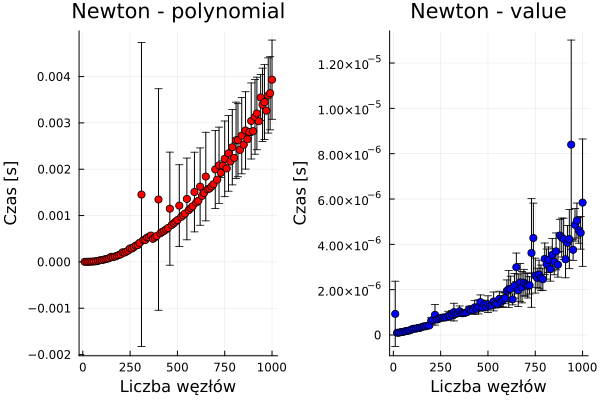

In [ ]:
# Metoda Newtona
Newton_results = filter(row -> (row.method_name == "Newton - polynomial") || (row.method_name == "Newton - value"), results_combined)
scatter(
    Newton_results.no_nodes,
    Newton_results.time_mean,
    group=Newton_results.method_name,
    yerr=map(sqrt, Newton_results.time_var),
    colour=[:red :blue],
    layout=2,
    legend=false,
    xlabel="Liczba węzłów",
    ylabel="Czas [s]",
    title = [Newton_results.method_name[1] Newton_results.method_name[2]])

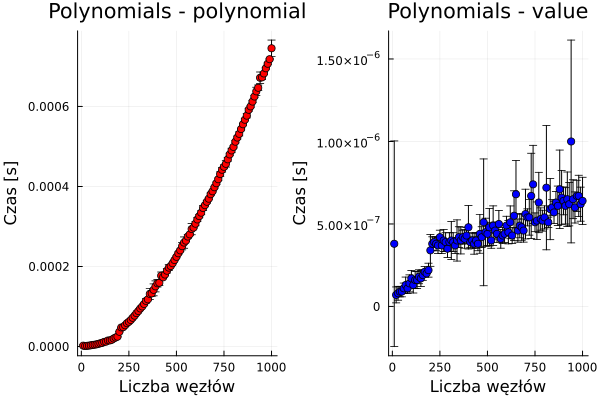

In [ ]:
# Pakiet Polynomial
Polynomial_results = filter(row -> (row.method_name == "Polynomials - polynomial") || (row.method_name == "Polynomials - value"), results_combined)
scatter(
    Polynomial_results.no_nodes,
    Polynomial_results.time_mean,
    group=Polynomial_results.method_name,
    yerr=map(sqrt, Polynomial_results.time_var),
    colour=[:red :blue],
    layout=2,
    legend=false,
    xlabel="Liczba węzłów",
    ylabel="Czas [s]",
    title = [Polynomial_results.method_name[1] Polynomial_results.method_name[2]])

### Zadanie 5
Zaimplementować algorytm Neville’a i sprawdzić (dla kilku wybranych punktów), czy daje te same wartości wielomianu co wybrana interpolacja wielomianowa.<b>(1 pkt)</b>

In [ ]:
using Polynomials

function NevilleAlgorithm(xs, ys, x)
    n = length(xs)
    P = zeros(n, n) # macierz wartości wielomianów coraz wyższych stopni

    for i in 1:n
        P[i,1] = ys[i]
    end

    for i in 2:n
        for j in 2:i
            P[i,j] = (P[i-1,j-1] * (x - xs[i]) + P[i,j-1] * (xs[i-j+1] - x)) / (xs[i-j+1] - xs[i]) # zapełniamy macierz
        end
    end

    return P[n,n]
end

xs = 1:2:20
ys = [rand() for x in xs]

f = fit(xs, ys)

points = rand(5) * 20

for point in points
    print("Wartość wielomianu w punkcie: ")
    println(point)
    print("Algorytm Nevillea: ")
    println(NevilleAlgorithm(xs, ys, point))
    print("Interpolacja wielomianowa z pakietu Polynomials: ")
    println(f(point))
    println()
end

Wartość wielomianu w punkcie: 17.241538938276403


Algorytm Nevillea: 0.07138839920469721
Interpolacja wielomianowa z pakietu Polynomials: 0.07138839926742953

Wartość wielomianu w punkcie: 19.598375214852606
Algorytm Nevillea: 9.118254860973638
Interpolacja wielomianowa z pakietu Polynomials: 9.118254860998821

Wartość wielomianu w punkcie: 0.4613717231416059
Algorytm Nevillea: -6.156552958064129
Interpolacja wielomianowa z pakietu Polynomials: -6.156552958064129

Wartość wielomianu w punkcie: 8.336055194188232
Algorytm Nevillea: 0.07204677567645273
Interpolacja wielomianowa z pakietu Polynomials: 0.07204677567752375

Wartość wielomianu w punkcie: 7.043910340353998
Algorytm Nevillea: 0.07002217792653112
Interpolacja wielomianowa z pakietu Polynomials: 0.07002217792696865



### Zadanie 6
Poeksperymentować z  interpolacją funkcjami sklejanymi (minimum dwie różne funkcje sklejane),  narysować wykresy i porównać z wykresami interpolacji wielomianowej. <b>Zademonstrować  efekt Rungego</b> <b>(1 pkt)</b>

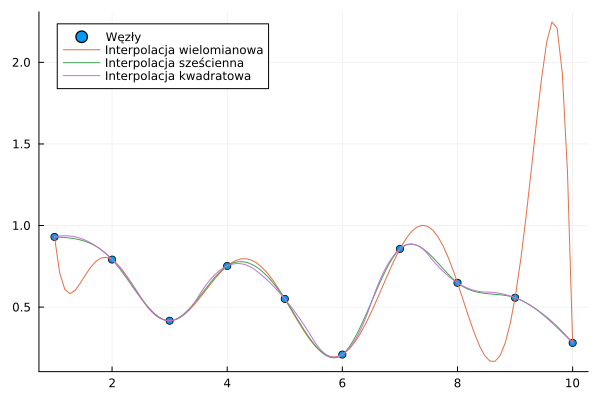

In [ ]:
using Interpolations
using Plots
using Polynomials

xs =  1:1:10
xsf = 1:0.01:10
ys = [rand() for x in xs]

scatter(xs, ys, label="Węzły")

f = fit(xs, ys)
plot!(f,  extrema(xs)..., label="Interpolacja wielomianowa")

interp_cubic = CubicSplineInterpolation(xs, ys)
ysf2 = [interp_cubic(x) for x in xsf]
plot!(xsf, ysf2, label="Interpolacja sześcienna")

itp = interpolate(ys, BSpline(Quadratic(Free(OnGrid()))))
ysf3 = [itp(x) for x in xsf]
plot!(xsf, ysf3, label="Interpolacja kwadratowa")

##### Efekt Rungego

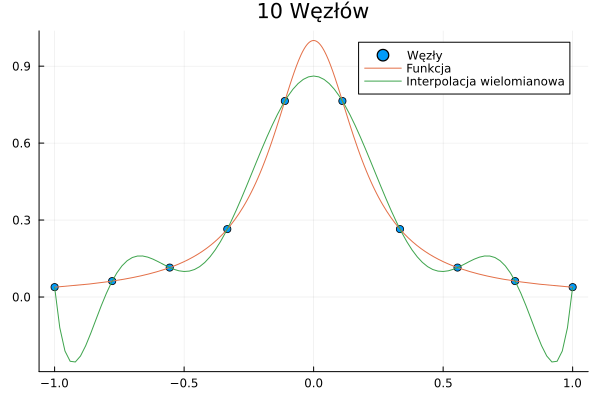

In [ ]:
using Interpolations
using Plots
using Polynomials

func(x) = 1 / (1 + 25*x^2)

xs_10 =  range(-1, 1, length=10)
ys_10 = func.(xs_10)

scatter(xs_10, ys_10, label="Węzły")
plot!(func, label="Funkcja")
title!("10 Węzłów")
f = fit(xs_10, ys_10)
plot!(f,  extrema(xs_10)..., label="Interpolacja wielomianowa")

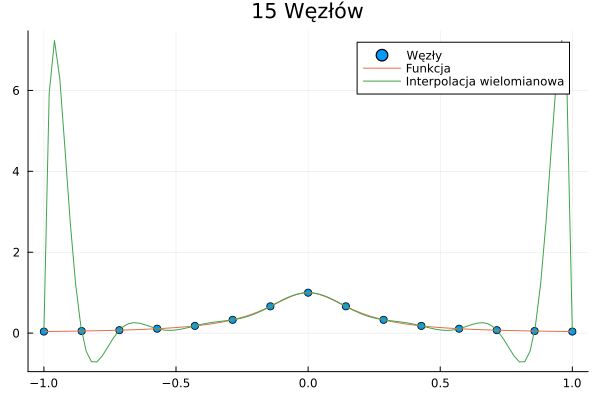

In [ ]:
xs_15 =  range(-1, 1, length=15)
ys_15 = func.(xs_15)

scatter(xs_15, ys_15, label="Węzły")
plot!(func, label="Funkcja")
title!("15 Węzłów")
f = fit(xs_15, ys_15)
plot!(f,  extrema(xs_15)..., label="Interpolacja wielomianowa")

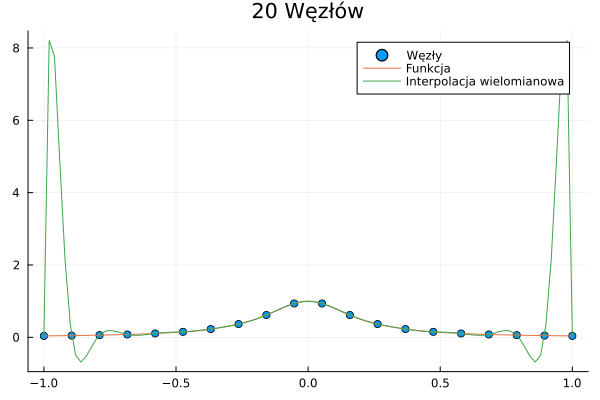

In [ ]:
xs_20 =  range(-1, 1, length=20)
ys_20 = func.(xs_20)

scatter(xs_20, ys_20, label="Węzły")
plot!(func, label="Funkcja")
title!("20 Węzłów")
f = fit(xs_20, ys_20)
plot!(f,  extrema(xs_20)..., label="Interpolacja wielomianowa")